In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from scipy.ndimage import gaussian_filter
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
def plotting_tSNE(df, n_iter, name):
    
    rxnfp = np.array([json.loads(x) for x in df["RXNFP_FP"]])
    value_tags=np.array(df.YIELD)
    
    tsne = TSNE(n_components=2, random_state=42, n_iter=n_iter)
    embeddings = tsne.fit_transform(rxnfp)
    
    # Set up the grid
    x = np.linspace(embeddings[:, 0].min(), embeddings[:, 0].max(), num=100)
    y = np.linspace(embeddings[:, 1].min(), embeddings[:, 1].max(), num=100)
    xx, yy = np.meshgrid(x, y)
    
    # Create a scatter plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(embeddings[:, 0], embeddings[:, 1], c=value_tags, cmap='viridis')

    # Add a colorbar for the value-tags
    cbar = fig.colorbar(sc)
    cbar.set_label('Yield')

    # Set labels and title
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.set_title('RXNFP t-SNE')
    plt.savefig(f'publication_plot_{name}.png', dpi=300)
    # Display the plot
    plt.show()

In [3]:
def plotting_tSNE_with_cluster_labels(df, n_iter, n_clusters):
    rxnfp = np.array([json.loads(x) for x in df["RXNFP_FP"]])
    value_tags=np.array(df.YIELD)
    
    tsne = TSNE(n_components=2, random_state=42, n_iter=n_iter)
    embeddings = tsne.fit_transform(rxnfp)

    # Adjust the number of clusters as needed
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Create a scatter plot colored by value-tags and labeled clusters
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(embeddings[:, 0], embeddings[:, 1], c=value_tags, cmap='viridis', alpha=0.8)
    
    closest_indices, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, embeddings)
    # Add cluster labels
    for i, index in enumerate(closest_indices):
        cluster_label = f"cluster {i+1}"
        ax.annotate(cluster_label, (embeddings[index, 0], embeddings[index, 1]), xytext=(5, 5),
                    textcoords='offset points', color='black', weight='regular', backgroundcolor='white')

    # Add a colorbar for the value-tags
    cbar = fig.colorbar(sc)
    cbar.set_label('Yield')

    # Set labels and title
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.set_title('t-SNE Plot with Enclosed Clusters and Yield')

    # Display the plot
    plt.show()

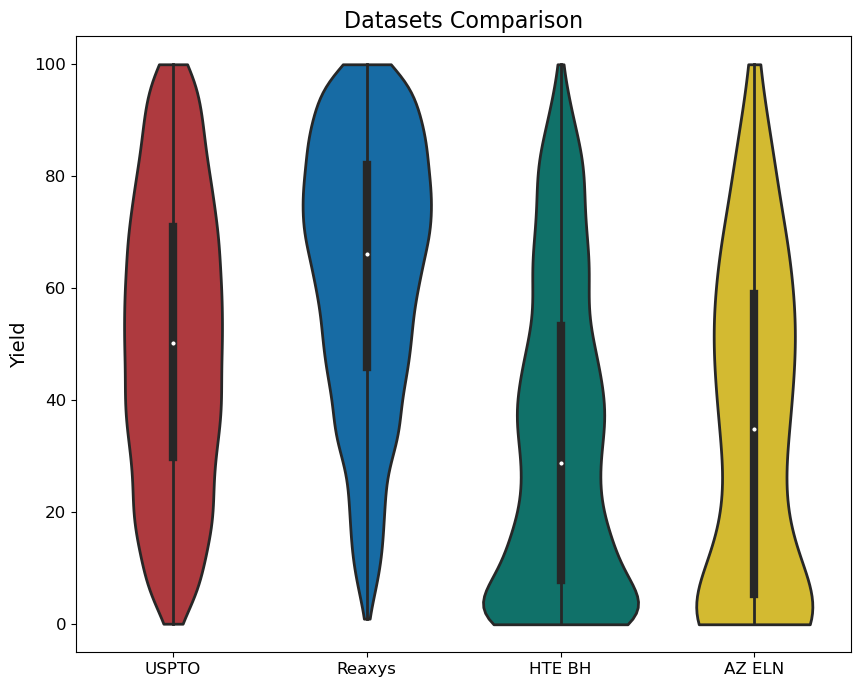

In [42]:
import seaborn as sns


# Generate random data for multiple distributions (example)
np.random.seed(42)
data1 = df_us.YIELD
data2 = df_rx.YIELD
data3 = df_hte.YIELD
data4 = df_az.YIELD


# Combine the data into a single DataFrame
df = pd.DataFrame()

# Create a list to store the distributions
distributions = []
distributions.extend(['USPTO'] * len(data1))
distributions.extend(['Reaxys'] * len(data2))
distributions.extend(['HTE BH'] * len(data3))
distributions.extend(['AZ ELN'] * len(data4))

# Create a list to store the values
values = []
values.extend(data1)
values.extend(data2)
values.extend(data3)
values.extend(data4)

df['Distribution'] = distributions
df['Value'] = values

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the violin plots
sns.violinplot(x='Distribution', y='Value', data=df, ax=ax, kind="swarm", cut=0, linewidth=2, width=0.8)

# Customization
ax.set_xlabel('', fontsize=14)  # Increase the font size of x-label
ax.set_ylabel('Yield', fontsize=14)  # Increase the font size of y-label
ax.set_title('Datasets Comparison', fontsize=16)  # Increase the font size of title
ax.tick_params(axis='both', labelsize=12)  # Increase the font size of tick labels
#ax.set_ylim(0, 100)

plt.show()

In [4]:
# Load the datasets
df_us = pd.read_csv('df_us_bh_rxnfp_mhfp6_no_dupl.csv')
df_rx = pd.read_csv('df_rx_bh_rxnfp_mhfp6_no_dupl.csv')
df_hte = pd.read_csv('df_hte_bh_rxnfp_mhfp6_no_dupl.csv')
df_az = pd.read_csv('df_az_bh_rxnfp_mhfp6_no_dupl.csv')


delimiter = '.'
df_us['rxn'] = df_us.apply(lambda row: delimiter.join(row[['CONDITIONS', 'NO_MAP_NO_COND']]), axis=1)
df_us.dropna(subset = ['rxn'], inplace=True)
df_rx['rxn'] = df_rx.apply(lambda row: delimiter.join(row[['CONDITIONS', 'NO_MAP_NO_COND']]), axis=1)
df_rx.dropna(subset = ['rxn'], inplace=True)
df_hte['rxn'] = df_hte.apply(lambda row: delimiter.join(row[['CONDITIONS', 'NO_MAP_NO_COND']]), axis=1)
df_hte.dropna(subset = ['rxn'], inplace=True)
df_az['rxn'] = df_az.apply(lambda row: delimiter.join(row[['CONDITIONS', 'NO_MAP_NO_COND']]), axis=1)
df_az.dropna(subset = ['rxn'], inplace=True)


# Split the datasets into features and target variables
X4 = np.array([json.loads(x) for x in df_az["RXNFP_FP"]])
y4 = np.array(df_az.YIELD)

X1 = np.array([json.loads(x) for x in df_us["RXNFP_FP"]])
y1 = np.array(df_us.YIELD)


X2 = np.array([json.loads(x) for x in df_rx["RXNFP_FP"]])
y2 = np.array(df_rx.YIELD)


X3 = np.array([json.loads(x) for x in df_hte["RXNFP_FP"]])
y3 = np.array(df_hte.YIELD)


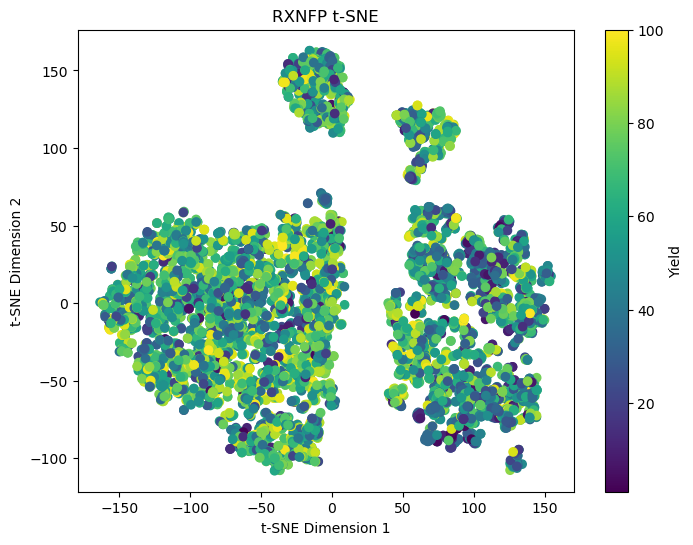

In [29]:
plotting_tSNE(df_rx, 10000, 'reaxys')

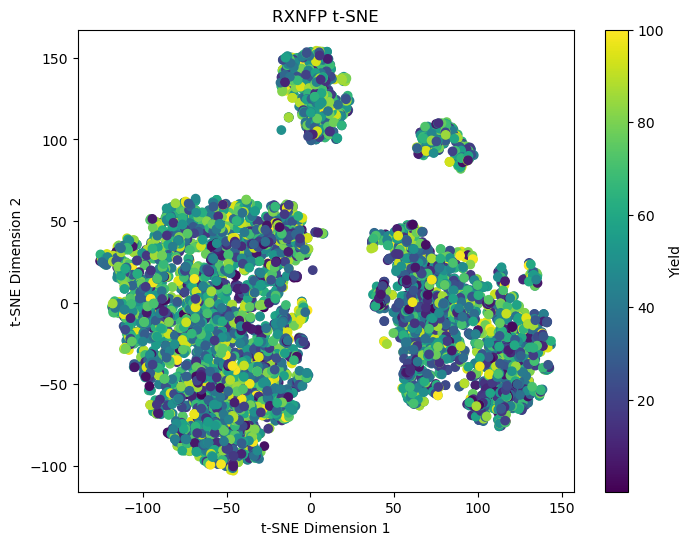

In [30]:
plotting_tSNE(df_us, 10000, 'uspto')

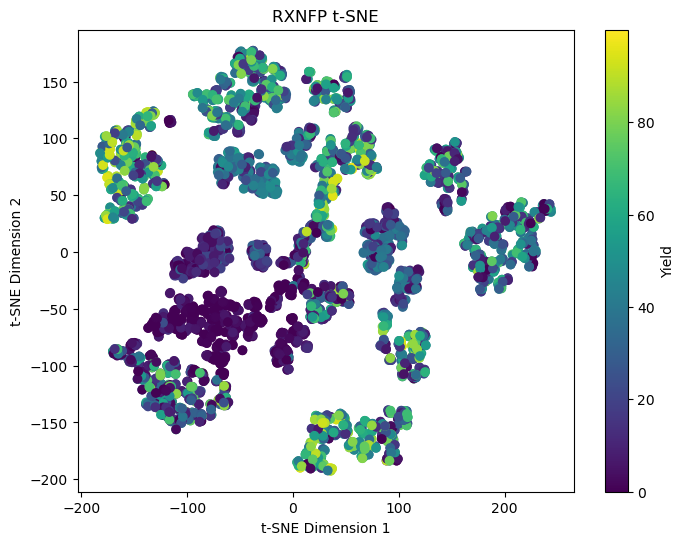

In [45]:
plotting_tSNE(df_hte, 10000)

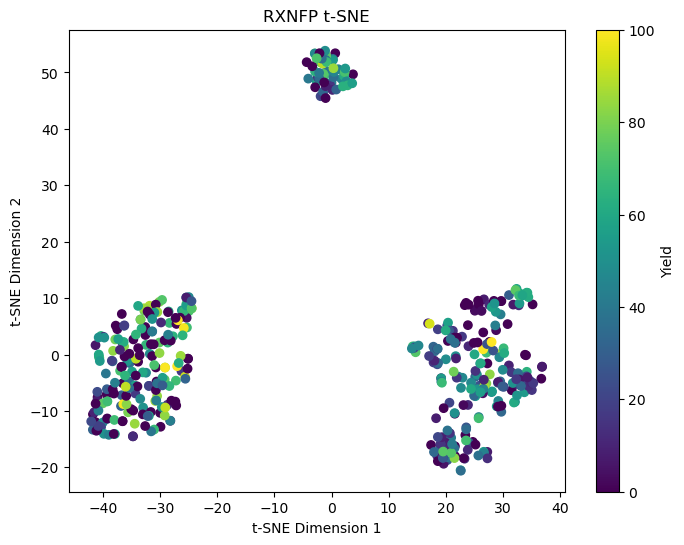

In [31]:
plotting_tSNE(df_az, 10000, 'az_eln')

/projects/mai/users/kjkh840_varvara/miniconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


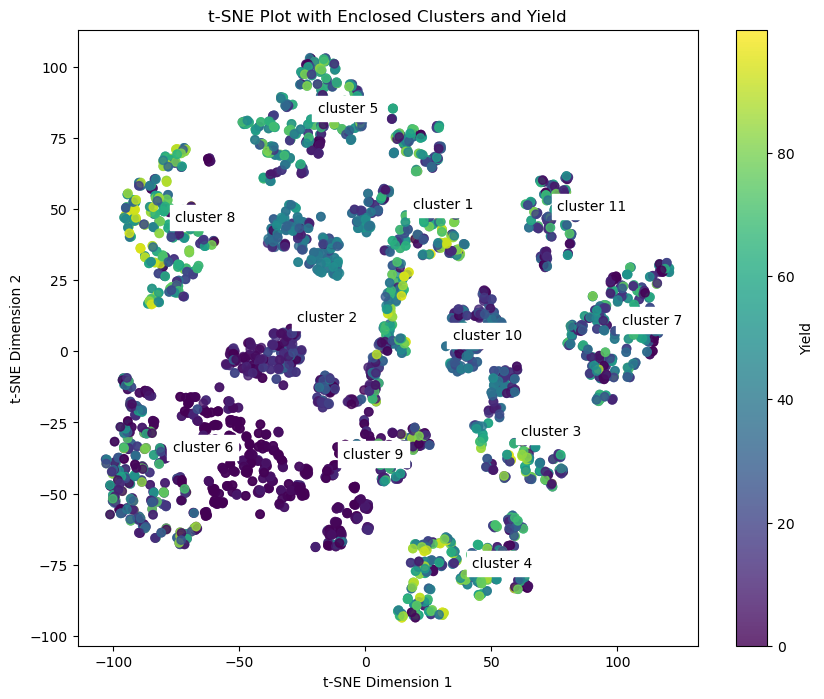

In [8]:
plotting_tSNE_with_cluster_labels(df_hte, 2000, 11)

In [24]:
def plotting_tSNE_with_cluster_labels_cluster_stats(df, n_iter, n_clusters):
    rxnfp = np.array([json.loads(x) for x in df["RXNFP_FP"]])
    value_tags=np.array(df.YIELD)
    
    tsne = TSNE(n_components=2, random_state=42, n_iter=n_iter)
    embeddings = tsne.fit_transform(rxnfp)

    # Adjust the number of clusters as needed
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Create a scatter plot colored by value-tags and labeled clusters
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(embeddings[:, 0], embeddings[:, 1], c=value_tags, cmap='viridis', alpha=0.8)
    
    closest_indices, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, embeddings)
    # Add cluster labels
    for i, index in enumerate(closest_indices):
        cluster_label = f"cluster {i+1}"
        ax.annotate(cluster_label, (embeddings[index, 0], embeddings[index, 1]), xytext=(5, 5),
                    textcoords='offset points', color='black', weight='regular', backgroundcolor='white')

    # Add a colorbar for the value-tags
    cbar = fig.colorbar(sc)
    cbar.set_label('Yield')

    # Set labels and title
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.set_title('RXNFP t-SNE')
    plt.savefig('clusters_hte/publication_plot.png', dpi=300)  # Save the plot as an image file
    # Display the plot
    plt.show()
        # Add the cluster labels to the original DataFrame
    df['Cluster'] = cluster_labels

    # Determine the number of clusters
    num_clusters = len(df['Cluster'].unique())

    # Create a dictionary to store the separate DataFrames for each cluster
    cluster_dataframes = {}

    # Iterate over each cluster
    for cluster in range(num_clusters):
        # Create a separate DataFrame for the current cluster
        cluster_df = df[df['Cluster'] == cluster]
        print(f'cluster_number: {cluster+1}, mean_yield_of_cluster: {cluster_df["YIELD"].mean()}, cluster_length:{len(cluster_df)}')
        # Remove the 'Cluster' column from the cluster DataFrame
        cluster_df = cluster_df.drop('Cluster', axis=1)

        # Store the cluster DataFrame in the dictionary
        cluster_dataframes[cluster] = cluster_df



/projects/mai/users/kjkh840_varvara/miniconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


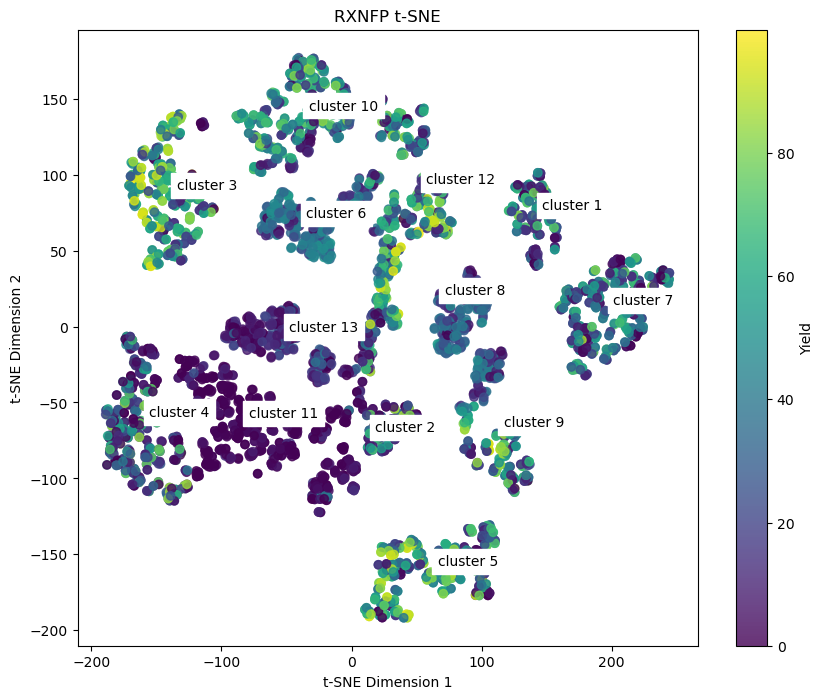

cluster_number: 1, mean_yield_of_cluster: 31.180699267974994, cluster_length:160
cluster_number: 2, mean_yield_of_cluster: 15.224187448349207, cluster_length:315
cluster_number: 3, mean_yield_of_cluster: 54.998225275502705, cluster_length:370
cluster_number: 4, mean_yield_of_cluster: 26.058376876814723, cluster_length:394
cluster_number: 5, mean_yield_of_cluster: 48.13629861773889, cluster_length:360
cluster_number: 6, mean_yield_of_cluster: 34.2155747483128, cluster_length:211
cluster_number: 7, mean_yield_of_cluster: 35.78575127016945, cluster_length:360
cluster_number: 8, mean_yield_of_cluster: 35.99627785642461, cluster_length:325
cluster_number: 9, mean_yield_of_cluster: 38.90876398788136, cluster_length:236
cluster_number: 10, mean_yield_of_cluster: 42.53611860845376, cluster_length:346
cluster_number: 11, mean_yield_of_cluster: 2.0193111031641338, cluster_length:329
cluster_number: 12, mean_yield_of_cluster: 43.10220721119814, cluster_length:323
cluster_number: 13, mean_yield_of

In [25]:
plotting_tSNE_with_cluster_labels_cluster_stats(df_hte, 10000, 13)

In [21]:
def plotting_tSNE_with_cluster_labels_cluster_save(df, n_iter, n_clusters, special_cluster_num):
    rxnfp = np.array([json.loads(x) for x in df["RXNFP_FP"]])
    value_tags=np.array(df.YIELD)
    
    tsne = TSNE(n_components=2, random_state=42, n_iter=n_iter)
    embeddings = tsne.fit_transform(rxnfp)

    # Adjust the number of clusters as needed
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Create a scatter plot colored by value-tags and labeled clusters
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(embeddings[:, 0], embeddings[:, 1], c=value_tags, cmap='viridis', alpha=0.8)
    
    closest_indices, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, embeddings)
    # Add cluster labels
    for i, index in enumerate(closest_indices):
        cluster_label = f"cluster {i+1}"
        ax.annotate(cluster_label, (embeddings[index, 0], embeddings[index, 1]), xytext=(5, 5),
                    textcoords='offset points', color='black', weight='regular', backgroundcolor='white')

    # Add a colorbar for the value-tags
    cbar = fig.colorbar(sc)
    cbar.set_label('Yield')

    # Set labels and title
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.set_title('RXNFP t-SNE')
    plt.savefig('clusters_hte/publication_plot.png', dpi=300)  # Save the plot as an image file
    # Display the plot
    plt.show()
        # Add the cluster labels to the original DataFrame
    df['Cluster'] = cluster_labels

    # Determine the number of clusters
    num_clusters = len(df['Cluster'].unique())

    # Create a separate DataFrame for the current cluster
    cluster_df = df[df['Cluster'] == special_cluster_num-1]
    cluster_df.to_csv(f'clusters_hte/df_hte_cluster_{special_cluster_num}.csv', index=False)
    else_df = df[df['Cluster'] != special_cluster_num-1]
    else_df.to_csv(f'clusters_hte/df_hte_not_cluster_{special_cluster_num}.csv', index=False)


/projects/mai/users/kjkh840_varvara/miniconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


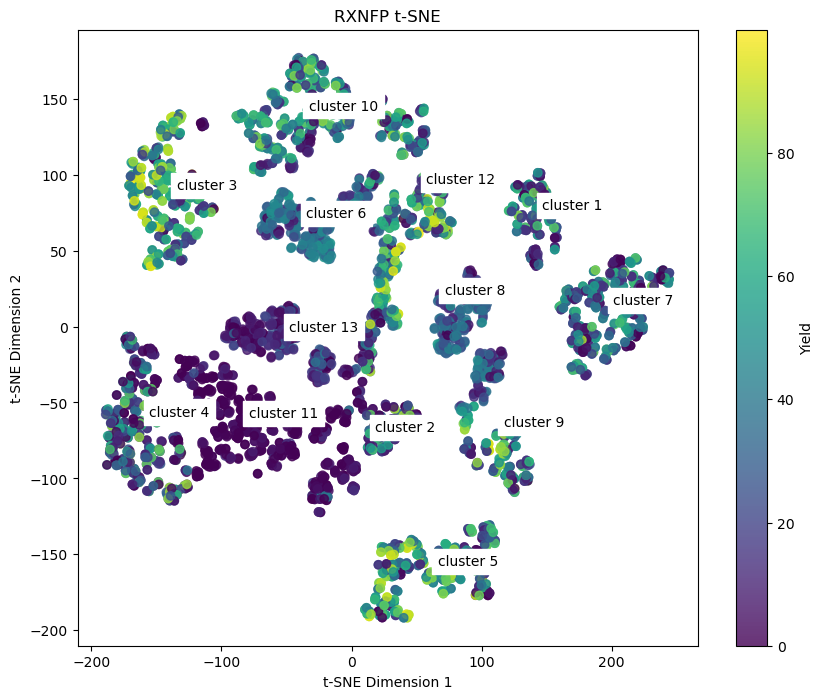

In [26]:
plotting_tSNE_with_cluster_labels_cluster_save(df_hte, 10000, 13, 11)

In [32]:
df_bh_clust = pd.read_csv("clusters_hte/df_hte_cluster_labels.csv")

In [34]:
df_bh_clust.head()

,Unnamed: 0.1,Unnamed: 0,Ligand,Additive,Base,Aryl halide,YIELD,FULL_MAPPED,MAPPED_COND_SEP,CONDITIONS,MAPPED_NO_COND,NO_MAP_COND_SEP,NO_MAP_NO_COND,RXNFP_FP,MHFP6,rxn,Cluster
0,16,16,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,FC(C=CC=C1F)=C1C2=CC=NO2,CN1CCCN2C1=NCCC2,ClC1=CC=C(CC)C=C1,11.255026,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)C(C)(C)C...,Cl[c:6]1[cH:5][cH:4][c:3]([CH2:2][CH3:1])[cH:1...,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)C(C)(C)C...,Cl[c:6]1[cH:5][cH:4][c:3]([CH2:2][CH3:1])[cH:1...,CCc1ccc(Cl)cc1.Cc1ccc(N)cc1>CC(C)c1cc(C(C)C)c(...,CCc1ccc(Cl)cc1.Cc1ccc(N)cc1>>CCc1ccc(Nc2ccc(C)...,"[0.06340262293815613, -0.8147379755973816, -0....","[245, 0, 39, 1, 72, 0, 115, 1, 230, 2, 69, 0, ...",CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)C(C)(C)C...,10
1,19,19,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,CC1=NOC(C(OCC)=O)=C1,CN1CCCN2C1=NCCC2,ClC1=CC=C(CC)C=C1,0.646779,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)C(C)(C)C...,Cl[c:6]1[cH:5][cH:4][c:3]([CH2:2][CH3:1])[cH:1...,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)C(C)(C)C...,Cl[c:6]1[cH:5][cH:4][c:3]([CH2:2][CH3:1])[cH:1...,CCc1ccc(Cl)cc1.Cc1ccc(N)cc1>CC(C)c1cc(C(C)C)c(...,CCc1ccc(Cl)cc1.Cc1ccc(N)cc1>>CCc1ccc(Nc2ccc(C)...,"[0.28406012058258057, -0.2744297385215759, -0....","[245, 0, 39, 1, 72, 0, 115, 1, 230, 2, 139, 1,...",CC(C)c1cc(C(C)C)c(-c2ccccc2P(C(C)(C)C)C(C)(C)C...,10
2,20,20,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,CC1=NOC(C2=CC=CC=C2)=C1,CC(C)(C)/N=C(N(C)C)/N(C)C,ClC1=CC=C(CC)C=C1,4.710886,CN(C)C(=NC(C)(C)C)N(C)C.COc1ccc(OC)c(P(C(C)(C)...,Cl[c:6]1[cH:5][cH:4][c:3]([CH2:2][CH3:1])[cH:1...,CN(C)C(=NC(C)(C)C)N(C)C.COc1ccc(OC)c(P(C(C)(C)...,Cl[c:6]1[cH:5][cH:4][c:3]([CH2:2][CH3:1])[cH:1...,CCc1ccc(Cl)cc1.Cc1ccc(N)cc1>CN(C)C(=NC(C)(C)C)...,CCc1ccc(Cl)cc1.Cc1ccc(N)cc1>>CCc1ccc(Nc2ccc(C)...,"[0.03485672175884247, -0.19929563999176025, -0...","[245, 0, 39, 1, 72, 0, 115, 1, 230, 2, 69, 0, ...",CN(C)C(=NC(C)(C)C)N(C)C.COc1ccc(OC)c(P(C(C)(C)...,10
3,23,23,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,CC1=CC(C(OCC)=O)=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,ClC1=CC=C(CC)C=C1,0.858975,CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C.CCOC...,Cl[c:6]1[cH:5][cH:4][c:3]([CH2:2][CH3:1])[cH:1...,CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C.CCOC...,Cl[c:6]1[cH:5][cH:4][c:3]([CH2:2][CH3:1])[cH:1...,CCc1ccc(Cl)cc1.Cc1ccc(N)cc1>CCN=P(N=P(N(C)C)(N...,CCc1ccc(Cl)cc1.Cc1ccc(N)cc1>>CCc1ccc(Nc2ccc(C)...,"[0.33948203921318054, -0.2957058846950531, -0....","[245, 0, 39, 1, 72, 0, 115, 1, 230, 0, 69, 0, ...",CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C.CCOC...,10
4,37,37,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C3CCCCC3)...,CC1=CC(N2C=CC=C2)=NO1,CN1CCCN2C1=NCCC2,ClC1=CC=C(OC)C=C1,1.798923,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,Cl[c:6]1[cH:5][cH:4][c:3]([O:2][CH3:1])[cH:16]...,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,Cl[c:6]1[cH:5][cH:4][c:3]([O:2][CH3:1])[cH:16]...,COc1ccc(Cl)cc1.Cc1ccc(N)cc1>CC(C)c1cc(C(C)C)c(...,COc1ccc(Cl)cc1.Cc1ccc(N)cc1>>COc1ccc(Nc2ccc(C)...,"[0.14478501677513123, -0.20914211869239807, -0...","[245, 0, 39, 1, 72, 0, 115, 1, 230, 0, 139, 1,...",CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,10


In [38]:
for clust in df_bh_clust["Cluster"].unique():
    print(clust)
    cl = df_bh_clust[df_bh_clust["Cluster"]==clust]
    print(len(cl))
    print("Ligand")
    print(cl.Ligand.value_counts())
    print("Additive")
    print(cl.Additive.value_counts())
    print("Base")
    print(cl.Base.value_counts())    

10
329
Ligand
CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)C(C)(C)C)C(OC)=CC=C2OC                                                               88
CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)C(C)(C)C)C=CC=C2                                                                     85
CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C3CCCCC3)C4CCCCC4)C=CC=C2                                                                     83
CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[C@@H]4C5)C[C@H](C4)C[C@H]5C3)[C@]6(C7)C[C@@H](C[C@@H]7C8)C[C@@H]8C6)C(OC)=CC=C2OC    73
Name: Ligand, dtype: int64
Additive
CCOC(C1=NOC=C1)=O              28
CCOC(C1=CON=C1)=O              28
O=C(OC)C1=NOC(C2=CC=CS2)=C1    25
O=C(OC)C1=NOC(C2=CC=CO2)=C1    25
O=C(OC)C1=CC=NO1               23
CC1=NOC=C1                     23
CC1=CC=NO1                     23
FC(C=CC=C1F)=C1C2=CC=NO2       20
CC1=NOC(C(OCC)=O)=C1           20
CC1=NOC(C2=CC=CC=C2)=C1        20
CC1=CC(C(OCC)=O)=NO1           20
CC1=C(C(OCC)=O)C=NO1           20
CC1=CC

In [5]:
# Load the datasets
df_us = pd.read_csv('df_us_bh_rxnfp_mhfp6_no_dupl.csv')
df_rx = pd.read_csv('df_rx_bh_rxnfp_mhfp6_no_dupl.csv')
df_hte = pd.read_csv('df_hte_bh_rxnfp_mhfp6_no_dupl.csv')
df_az = pd.read_csv('df_az_bh_rxnfp_mhfp6_no_dupl.csv')

NameError: name 'bh_hte' is not defined

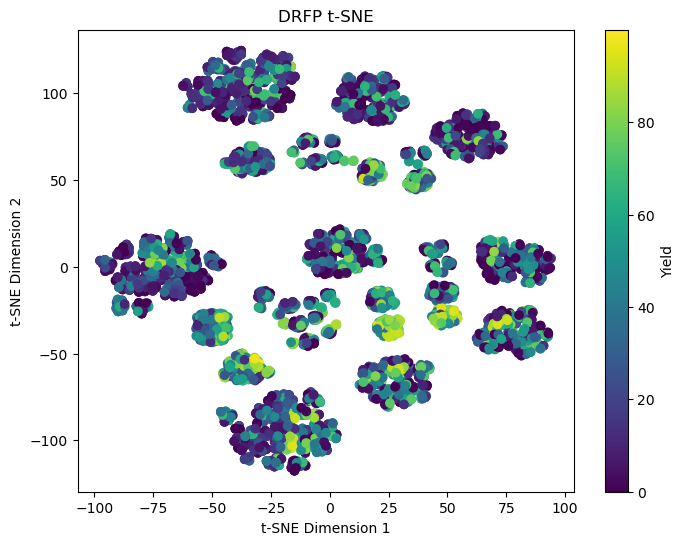

In [11]:
drfp_hte = np.array(joblib.load("bh_hte_drfp.pickle"))
value_tags=np.array(df_hte.YIELD)

tsne = TSNE(n_components=2, random_state=42, n_iter=10000)
embeddings = tsne.fit_transform(drfp_hte)

# Set up the grid
x = np.linspace(embeddings[:, 0].min(), embeddings[:, 0].max(), num=100)
y = np.linspace(embeddings[:, 1].min(), embeddings[:, 1].max(), num=100)
xx, yy = np.meshgrid(x, y)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(embeddings[:, 0], embeddings[:, 1], c=value_tags, cmap='viridis')

# Add a colorbar for the value-tags
cbar = fig.colorbar(sc)
cbar.set_label('Yield')

# Set labels and title
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_title('DRFP t-SNE')
plt.savefig(f'publication_plot_bh_hte_drfp.png', dpi=300)
# Display the plot
plt.show()

In [ ]:
embeddings_drfp_hte = embeddings

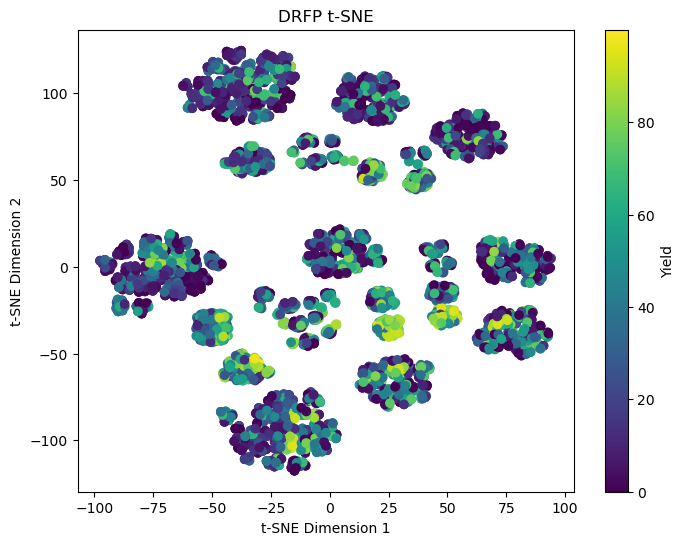

In [13]:
# Create a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(embeddings[:, 0], embeddings[:, 1], c=value_tags, cmap='viridis')

# Add a colorbar for the value-tags
cbar = fig.colorbar(sc)
cbar.set_label('Yield')

# Set labels and title
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_title('DRFP t-SNE')
plt.savefig(f'publication_plot_bh_hte_drfp.png', dpi=300)
# Display the plot
plt.show()

In [8]:
from drfp import DrfpEncoder

100%|██████████| 456/456 [00:13<00:00, 33.24it/s]


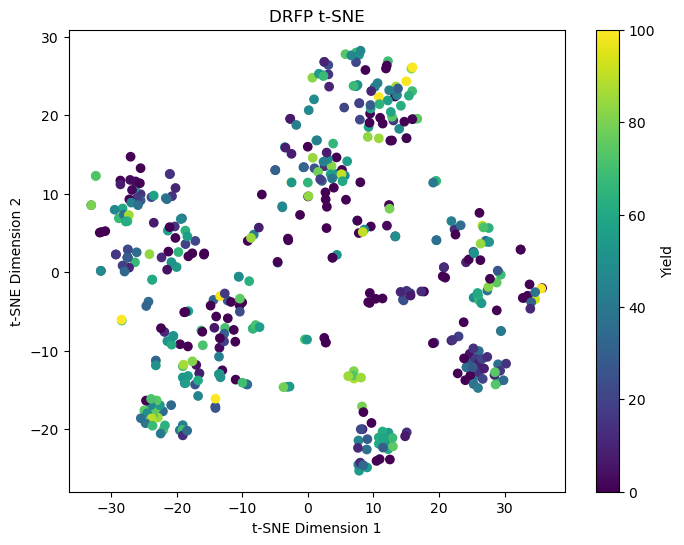

In [18]:
drfp_az = np.array(DrfpEncoder.encode(df_az['rxn'], show_progress_bar=True))
value_tags=np.array(df_az.YIELD)

tsne = TSNE(n_components=2, random_state=42, n_iter=10000)
embeddings_az_drfp = tsne.fit_transform(drfp_az)

# Set up the grid
x = np.linspace(embeddings_az_drfp[:, 0].min(), embeddings_az_drfp[:, 0].max(), num=100)
y = np.linspace(embeddings_az_drfp[:, 1].min(), embeddings_az_drfp[:, 1].max(), num=100)
xx, yy = np.meshgrid(x, y)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(embeddings_az_drfp[:, 0], embeddings_az_drfp[:, 1], c=value_tags, cmap='viridis')

# Add a colorbar for the value-tags
cbar = fig.colorbar(sc)
cbar.set_label('Yield')

# Set labels and title
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_title('DRFP t-SNE')
plt.savefig(f'publication_plot_az_eln_drfp.png', dpi=300)
# Display the plot
plt.show()

100%|██████████| 7130/7130 [03:40<00:00, 32.31it/s]


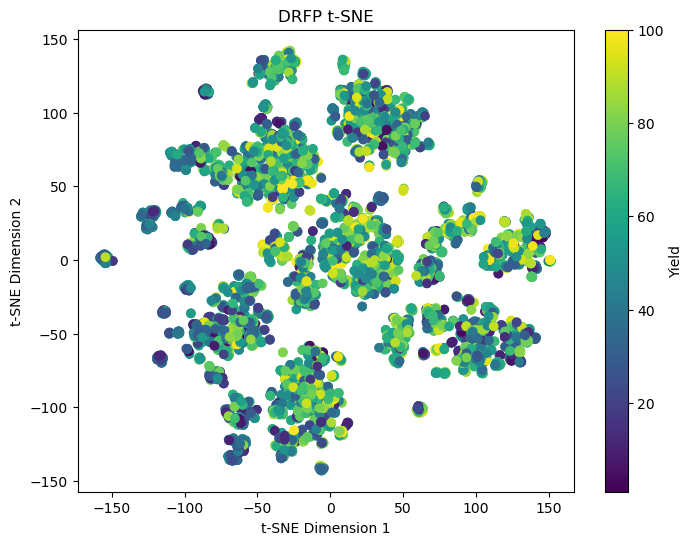

In [20]:
drfp_rx = np.array(DrfpEncoder.encode(df_rx['rxn'], show_progress_bar=True))
value_tags=np.array(df_rx.YIELD)

tsne = TSNE(n_components=2, random_state=42, n_iter=10000)
embeddings_rx_drfp = tsne.fit_transform(drfp_rx)

# Set up the grid
x = np.linspace(embeddings_rx_drfp[:, 0].min(), embeddings_rx_drfp[:, 0].max(), num=100)
y = np.linspace(embeddings_rx_drfp[:, 1].min(), embeddings_rx_drfp[:, 1].max(), num=100)
xx, yy = np.meshgrid(x, y)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(embeddings_rx_drfp[:, 0], embeddings_rx_drfp[:, 1], c=value_tags, cmap='viridis')

# Add a colorbar for the value-tags
cbar = fig.colorbar(sc)
cbar.set_label('Yield')

# Set labels and title
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_title('DRFP t-SNE')
plt.savefig(f'publication_plot_reaxys_drfp.png', dpi=300)
# Display the plot
plt.show()

100%|██████████| 5971/5971 [03:35<00:00, 27.76it/s]


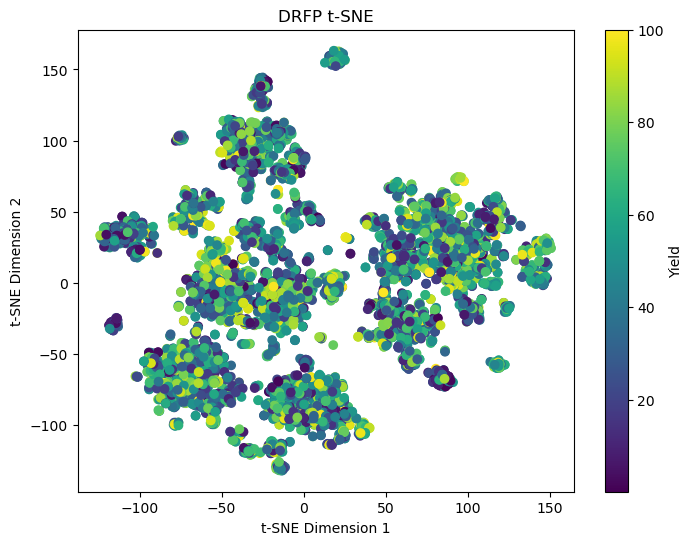

In [21]:
drfp_us = np.array(DrfpEncoder.encode(df_us['rxn'], show_progress_bar=True))
value_tags=np.array(df_us.YIELD)

tsne = TSNE(n_components=2, random_state=42, n_iter=10000)
embeddings_us_drfp = tsne.fit_transform(drfp_us)

# Set up the grid
x = np.linspace(embeddings_us_drfp[:, 0].min(), embeddings_us_drfp[:, 0].max(), num=100)
y = np.linspace(embeddings_us_drfp[:, 1].min(), embeddings_us_drfp[:, 1].max(), num=100)
xx, yy = np.meshgrid(x, y)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(embeddings_us_drfp[:, 0], embeddings_us_drfp[:, 1], c=value_tags, cmap='viridis')

# Add a colorbar for the value-tags
cbar = fig.colorbar(sc)
cbar.set_label('Yield')

# Set labels and title
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_title('DRFP t-SNE')
plt.savefig(f'publication_plot_uspto_drfp.png', dpi=300)
# Display the plot
plt.show()

In [22]:
combined_features = np.concatenate((drfp_us, drfp_rx, drfp_hte, drfp_az))
# Create labels for each dataset to differentiate them when plotting
dataset_ids = ['USPTO'] * len(df_us) + ['Reaxys'] * len(df_rx) + ['BH HTE'] * len(df_hte) + ['AZ ELN'] * len(df_az)

# Apply t-SNE on the combined features
tsne = TSNE(n_components=2, random_state=42, n_iter=10000)
tsne_data = tsne.fit_transform(combined_features)
import pickle
tsne_data.dump("tsne_data_for_bh_drfp.pickle")

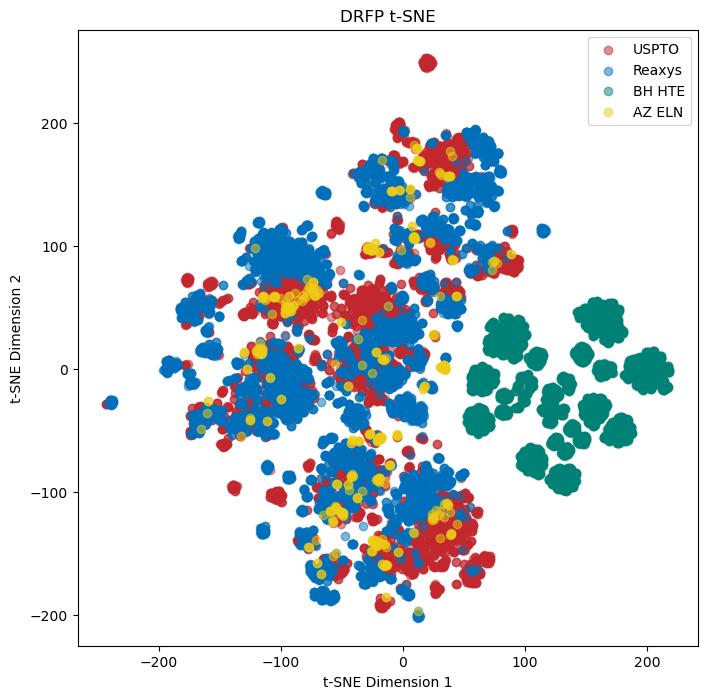

In [23]:
dataset_order = ['USPTO', 'Reaxys', 'BH HTE', 'AZ ELN']
plt.figure(figsize=(8, 8))
#custom_colors_jewel = ['teal', 'indigo', 'hotpink', 'cyan']
custom_colors_jewel = ['#c1272d', '#0070BB', '#008176', '#eecc16'] #'#0000a7'
sns.set_palette(custom_colors_jewel)
# Iterate over each dataset in the specified order
for dataset_id in dataset_order:
    # Retrieve the indices of the data belonging to the current dataset
    indices = [i for i, label in enumerate(dataset_ids) if label == dataset_id]

    # Plot the t-SNE points with the corresponding color
    plt.scatter(tsne_data[indices, 0], tsne_data[indices, 1], label=dataset_id, alpha=0.5)

plt.legend()
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("DRFP t-SNE")
plt.savefig(f'publication_plot_combined_drfp.png', dpi=300)
plt.show()

In [10]:
def plotting_tSNE_with_cluster_labels_cluster_save(df, n_iter, n_clusters):
    drfp = np.array(DrfpEncoder.encode(df['rxn'], show_progress_bar=True))
    value_tags=np.array(df.YIELD)
    
    tsne = TSNE(n_components=2, random_state=42, n_iter=n_iter)
    embeddings = tsne.fit_transform(drfp)

    # Adjust the number of clusters as needed
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Create a scatter plot colored by value-tags and labeled clusters
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(embeddings[:, 0], embeddings[:, 1], c=value_tags, cmap='viridis', alpha=0.8)
    
    closest_indices, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, embeddings)
    # Add cluster labels
    for i, index in enumerate(closest_indices):
        cluster_label = f"cluster {i+1}"
        ax.annotate(cluster_label, (embeddings[index, 0], embeddings[index, 1]), xytext=(5, 5),
                    textcoords='offset points', color='black', weight='regular', backgroundcolor='white')

    # Add a colorbar for the value-tags
    cbar = fig.colorbar(sc)
    cbar.set_label('Yield')

    # Set labels and title
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.set_title('DRFP t-SNE')
    plt.savefig(f'clusters_hte/publication_plot_drfp_{n_clusters}.png', dpi=300)  # Save the plot as an image file
    # Display the plot
    plt.show()
        # Add the cluster labels to the original DataFrame
    df['Cluster'] = cluster_labels

    df.to_csv(f'clusters_hte/df_hte_cluster_drfp_{n_clusters}.csv', index=False)
    return df

100%|██████████| 3955/3955 [01:53<00:00, 34.72it/s]
/projects/mai/users/kjkh840_varvara/miniconda3/envs/dft_for_sm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


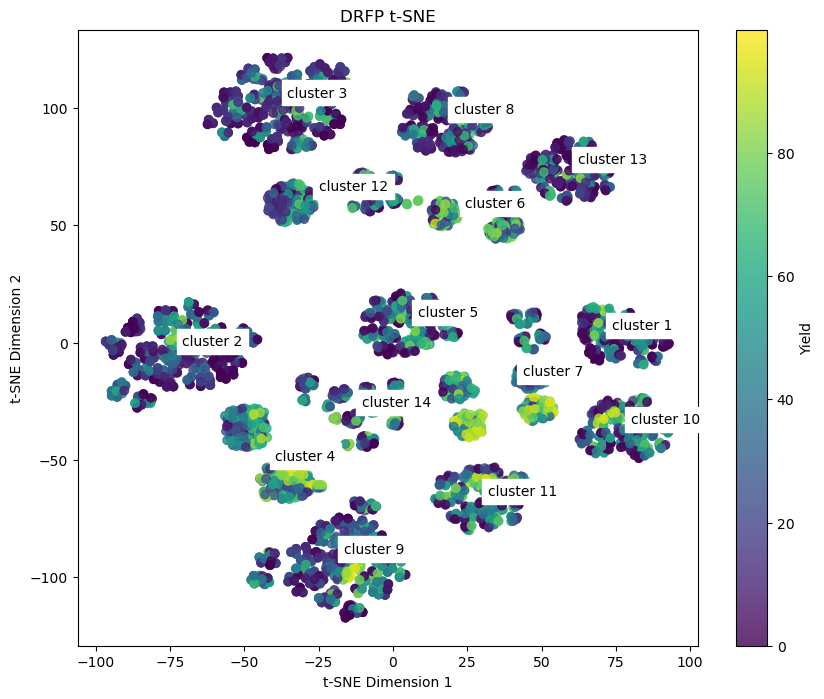

In [18]:
df_clusters_hte = plotting_tSNE_with_cluster_labels_cluster_save(df_hte, 10000, 14)

In [16]:
for clust in df_clusters_hte["Cluster"].unique():
    print(clust)
    cl = df_clusters_hte[df_clusters_hte["Cluster"]==clust]
    print(len(cl), cl["YIELD"].mean())
    print("Ligand")
    print(cl.Ligand.value_counts())
    print("Additive")
    print(cl.Additive.value_counts())
    print("Base")
    print(cl.Base.value_counts())   
    print("Aryl halide")
    print(cl["Aryl halide"].value_counts())

11
240 21.81859161725833
Ligand
CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[C@@H]4C5)C[C@H](C4)C[C@H]5C3)[C@]6(C7)C[C@@H](C[C@@H]7C8)C[C@@H]8C6)C(OC)=CC=C2OC    240
Name: Ligand, dtype: int64
Additive
C12=C(C=CC=C2)ON=C1                       12
CC1=CC=NO1                                12
C1(C2=CC=CC=C2)=CON=C1                    12
CC1=CC(N2C=CC=C2)=NO1                     12
C1(C2=CC=CC=C2)=NOC=C1                    12
CC1=NOC=C1                                12
CCOC(C1=CON=C1)=O                         12
CCOC(C1=NOC=C1)=O                         12
CC1=NOC(C2=CC=CC=C2)=C1                   12
C1(N(CC2=CC=CC=C2)CC3=CC=CC=C3)=CC=NO1    12
COC1=NOC(C(OCC)=O)=C1                     12
C1(N(CC2=CC=CC=C2)CC3=CC=CC=C3)=NOC=C1    12
CC1=CC(C(OCC)=O)=NO1                      12
CC1=NOC(C(OCC)=O)=C1                      12
FC(C=CC=C1F)=C1C2=CC=NO2                  12
CC1=C(C(OCC)=O)C=NO1                      12
C12=CON=C1C=CC=C2                         12
CC1=CC(C)=NO1                   

In [19]:
for ar_hal in df_clusters_hte["Aryl halide"].unique():
    df_ar = df_clusters_hte[df_clusters_hte["Aryl halide"]==ar_hal]
    print(ar_hal, df_ar.YIELD.mean() )

IC1=CC=C(OC)C=C1 32.54365922687879
IC1=CC=C(C(F)(F)F)C=C1 33.71043348064258
ClC1=CC=C(OC)C=C1 1.9437708162727272
BrC1=CC=C(OC)C=C1 25.894391244015154
BrC1=CC=C(C(F)(F)F)C=C1 26.902510732479087
IC1=CN=CC=C1 51.255736425558936
BrC1=CN=CC=C1 42.99980044757955
BrC1=CC=C(CC)C=C1 43.506827681503786
BrC1=NC=CC=C1 52.44908777469318
ClC1=CN=CC=C1 13.846498131564397
IC1=NC=CC=C1 58.6098744183106
ClC1=CC=C(CC)C=C1 3.8698378605992367
IC1=CC=C(CC)C=C1 52.58191135964773
ClC1=NC=CC=C1 43.47955728571592
ClC1=CC=C(C(F)(F)F)C=C1 12.511433508867423
